In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Reading file
df = pd.read_csv("D:/DS-GOIT/ds-hw-2/bestsellers with categories.csv")

__Initial Data Exploration__

In [2]:
## 2. # Displaying the first five lines of the dataset
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
## 3. Display the dimensions of the dataset (use the shape attribute)

In [4]:
## - Answer: How many books does the dataset?
print("Answer:", df.shape)

Answer: (550, 7)


In [5]:
duplicates = df.duplicated(['Name']).sum()
print("Number of duplicate rows:", duplicates)

if duplicates:
    df = df.drop_duplicates(['Name'])
    new_duplicates = df.duplicated(['Name']).sum()
    print("Number of duplicates after cleaning:", new_duplicates)
else:
    print('Dataset does not contain duplicates')

print("Shape of DataFrame:", df.shape)

Number of duplicate rows: 199
Number of duplicates after cleaning: 0
Shape of DataFrame: (351, 7)


In [6]:
# Renaming the columns
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [7]:
## 4. Check if all rows have complete data: display the number of missing values (na) in each column (use the isna and sum functions).

In [8]:
missing_values = df.isna().sum()
missing_values

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [9]:
## - Answer: Are there gaps in any variables? (Yes No)
## - No

In [10]:
## 5. Check what unique values are present in the column 'genre' (use the unique function).

In [11]:
unique_genres = df['genre'].unique()
print(unique_genres)

['Non Fiction' 'Fiction']


In [12]:
## - Answer: What are the unique genres?
## - 'Non Fiction' and 'Fiction'

In [13]:
## 6. Now, look at the distribution of prices: construct a histogram (use kind='hist').

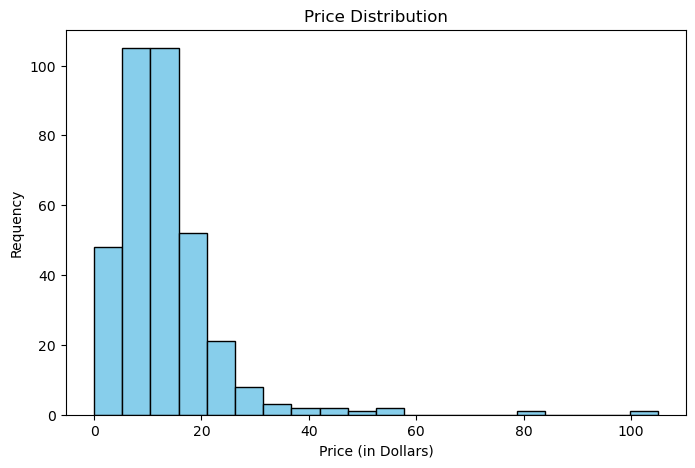

In [14]:
plt.figure(figsize=(8, 5))
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (in Dollars)')
plt.ylabel('Requency')
plt.show()

In [15]:
## 7. Determine the maximum, minimum, average, and median price (use the functions max, min, mean, median).
max_price = df['price'].max()
min_price = df['price'].min()
avg_price = df['price'].mean()
median_price = df['price'].median()
print("Maximum price:", max_price, "\nMinimum price:", min_price, "\nAverage price:", avg_price, "\nMedian price:", median_price)

Maximum price: 105 
Minimum price: 0 
Average price: 13.076923076923077 
Median price: 12.0


In [16]:
## - Answer: Maximum price?
## - 105
## - Answer: Minimum price?
## - 0
## - Answer: Average price?
## - 13.1
## - Answer: Median price?
## - 11

__Search and Sorting of Data__

In [17]:
## 1. What is the highest rating in the dataset?

In [18]:
max_rating = df['user_rating'].max()
print(f'Answer: {max_rating}')

Answer: 4.9


In [19]:
## 2. How many books have this highest rating?

In [20]:
books_with_highest_ratings = df[df['user_rating'] == max_rating]
count_books = books_with_highest_ratings['name'].count()
print(f"Answer:", count_books)

Answer: 28


In [21]:
## 3. Which book has the most reviews?

In [22]:
book_with_most_reviews = df.loc[df['reviews'].idxmax(), 'name']
print("Answer:", book_with_most_reviews)

Answer: Where the Crawdads Sing


In [23]:
## 4. Among the books that made it to the Top 50 in 2015, which one is the most expensive?

In [24]:
most_expensive_book_2015 = df[df['year'] == 2015].sort_values(by='price', ascending=False).iloc[0]['name']
print("Answer:", most_expensive_book_2015)

Answer: Go Set a Watchman: A Novel


In [25]:
## 5. Count of Fiction books in Top 50 in 2010
fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(f'{fiction_books_2010} Fiction Books was in Top 50(2010 year)')

17 Fiction Books was in Top 50(2010 year)


In [26]:
## 6. How many books with a rating of 4.9 made it to the rating list in 2010 or 2011 (use the | or isin function)?

In [27]:
books_rated_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print('Books Rated 4.9 in 2010 or 2011:', books_rated_4_9)

Books Rated 4.9 in 2010 or 2011: 1


In [28]:
## 7. Sorting books by price in 2015 that cost less than $8
sorted_books_by_price = df[(df['price'] < 8) & (df['year'] == 2015)].sort_values(by='price', ascending=True)
sorted_books_by_price

,name,author,user_rating,reviews,price,year,genre
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


In [29]:
## 8. Which book is the last one in the sorted list?

In [30]:
last_book_sorted = sorted_books_by_price['name'].iloc[-1]
print("Last book in the sorted list:", last_book_sorted)

Last book in the sorted list: Old School (Diary of a Wimpy Kid #10)


__Data Aggregation and Table Joining__

In [31]:
## 1. Let's start by looking at the maximum and minimum prices for each of the genres (use the groupby and agg functions, and for calculating the minimum and maximum values, use max and min).

In [32]:
genres_price = df.groupby('genre')['price'].agg(['max', 'min'])
genres_price

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


In [33]:
max_price_fiction = genres_price.loc['Fiction', 'max']
min_price_fiction = genres_price.loc['Fiction', 'min']
max_price_non_ficion = genres_price.loc['Non Fiction', 'max']
min_price_non_ficion = genres_price.loc['Non Fiction', 'min']
print("The maximum price for the genre Fiction:", max_price_fiction, "\nMinimum price for Fiction genre:", min_price_fiction, "\nMaximum price for Non Fiction genre:", max_price_non_ficion, "\nMinimum price for Non Fiction genre", min_price_non_ficion)
## - Answer: The maximum price for the genre Fiction
## - 82
## - Answer: Minimum price for Fiction genre
## - 0
## -  Answer: Maximum price for Non Fiction genre
## - 105
## - Answer: Minimum price for Non Fiction genre
## - 0

The maximum price for the genre Fiction: 82 
Minimum price for Fiction genre: 0 
Maximum price for Non Fiction genre: 105 
Minimum price for Non Fiction genre 0


In [34]:
## 2. Creating a new DataFrame with the count of books for each author

In [35]:
new_df = df.groupby('author')['name'].agg(['count'])

In [36]:
## 3. What is the dimension of the resulting table?

In [37]:
print("Answer:", new_df.size)

Answer: 248


In [38]:
## 4. Which author has the most books

In [39]:
most_books_author = new_df['count'].idxmax()
print("Answer:", most_books_author)

Answer: Jeff Kinney


In [40]:
## 5. How many books does this author have?

In [41]:
books_count_by_most_books_author = new_df.loc[most_books_author, 'count']
print("Answer:", books_count_by_most_books_author)

Answer: 12


In [42]:
## 6. Creating a DataFrame with the average rating for each author

In [43]:
new_df2 = df.groupby('author')['user_rating'].agg('mean')

In [44]:
## 7. Which author has the lowest average rating?

In [45]:
lowest_avg_rate = new_df2.idxmin()
print("Answer:", lowest_avg_rate)

Answer: Donna Tartt


In [46]:
## 8. What is the average rating for this author?

In [47]:
avg_rate_for_this_author = new_df2.min()
print("Answer:", avg_rate_for_this_author)

Answer: 3.9


In [48]:
## 9. Concatenating the two DataFrames.

In [49]:
df_concat = pd.concat([new_df, new_df2], axis=1)
df_concat

,count,user_rating
author,,
Abraham Verghese,1,4.60
Adam Gasiewski,1,4.40
Adam Mansbach,1,4.80
Adir Levy,1,4.80
Admiral William H. McRaven,1,4.70
...,...,...
Walter Isaacson,2,4.55
William Davis,1,4.40
William P. Young,1,4.60


In [50]:
## 10. Sort by increasing number of books and increasing rating.

In [51]:
author_sorts = df_concat.sort_values(by=['count', 'user_rating'])
author_sorts

,count,user_rating
author,,
Donna Tartt,1,3.900000
Gallup,1,4.000000
Gillian Flynn,1,4.000000
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


In [52]:
first_author = author_sorts.index[0]
print("Answer:", first_author)

Answer: Donna Tartt


__Visualization__

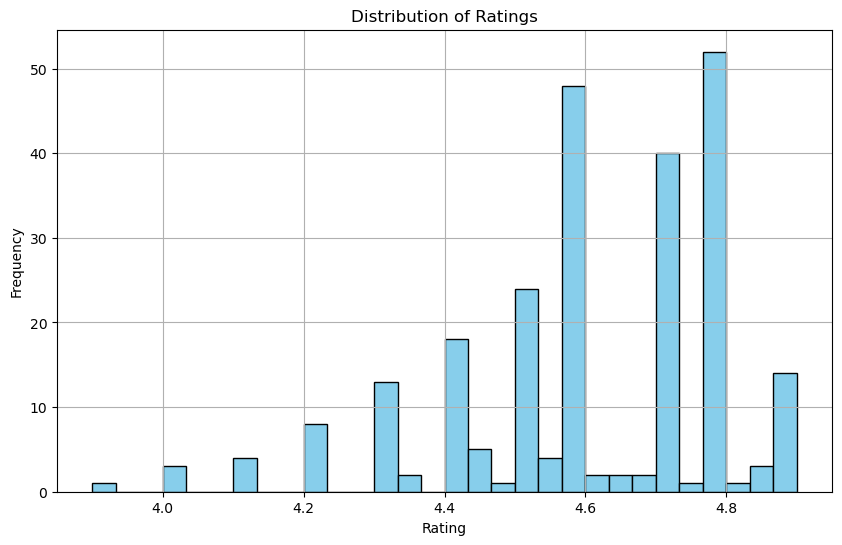

In [53]:
#histograma
grouped_ratings = df.groupby('author')['user_rating'].mean()

plt.figure(figsize=(10, 6))
plt.hist(grouped_ratings, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

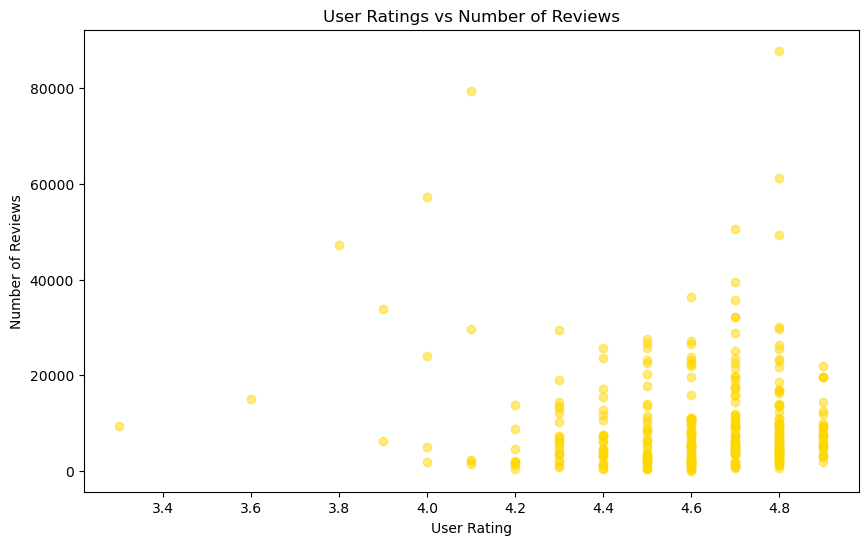

In [54]:
#scatter

x = df['user_rating']
y = df['reviews']

plt.figure(figsize=(10, 6))
plt.scatter(x=x, y=y, alpha=0.5, color='gold')
plt.title('User Ratings vs Number of Reviews')
plt.xlabel('User Rating')
plt.ylabel('Number of Reviews')
plt.show()

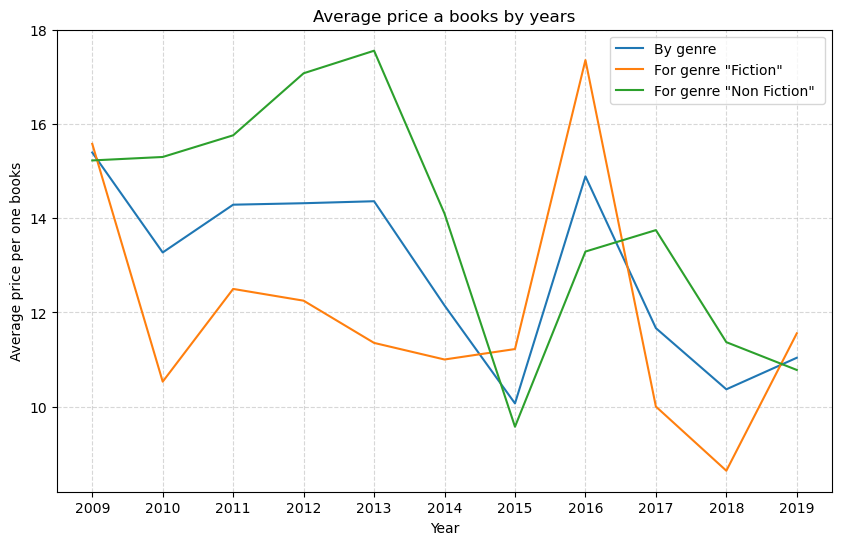

In [55]:
#scatter
yearly_avg_price = df.groupby('year').price.mean()
yearly_avg_price_genre = df.groupby(['year', 'genre'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
yearly_avg_price.plot(kind='line', label='By genre')
yearly_avg_price_genre['Fiction'].plot(kind='line', label='For genre "Fiction" ')
yearly_avg_price_genre['Non Fiction'].plot(kind='line', label='For genre "Non Fiction" ')
plt.title('Average price a books by years')
plt.xlabel('Year')
plt.ylabel('Average price per one books')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(yearly_avg_price.index[::1]) 
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

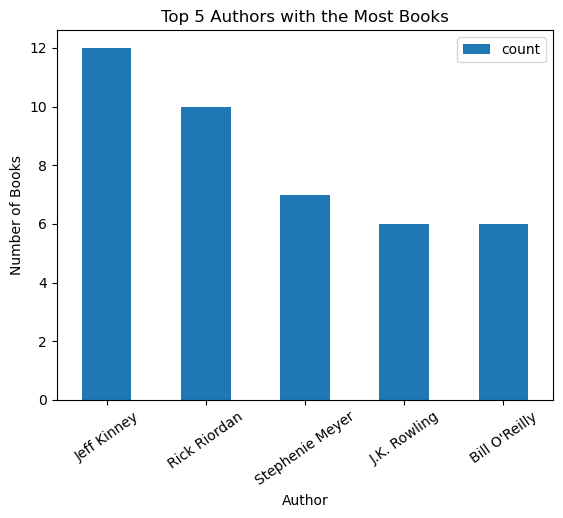

In [56]:
#chart bar
top_authors = new_df.sort_values(by='count', ascending=False).head(5)

plt.figure(figsize=(8, 6))
top_authors.plot(kind='bar')
plt.title('Top 5 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=35)
plt.show()